## Narrative Analytics and Experimentation Proposal

> An alcohol distributor is researching low traffic continents for countries with potential growth opportunities. This data was collected by the World Health Organization and contains the amount of consumption per capita for nearly 200 countries in 5 continents to track local consumer trends. The strategy is to seek countries with low influence in one of the facets of alcohol consumption to strategize future marketing campaigns for popular products to potentially lead the competitive market by inspiring a potential trend. 

> We discovered a low interquartile range in the continents of Africa and Asia for wine consumption with some interesting outliers. The datapoints for the outliers represent specific countries with higher consumption rates. Those datapoints could potentially become trend leaders for our superior wine collections that may incite a trend that will expand to other countries nearby. 

### The Problem

> Should we strategize a campaign within Africa or Asia? It would be very costly and time consuming to conduct deeper consumer analysis for both countries. There could be many factors attributed to consumption rates which could include accessibility, preferences, and/or more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
drinks = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/Git/part2/session_5-master/data/drinks.csv')

In [3]:
drinks.rename(columns={'beer_servings':'beer', 'spirit_servings':'spirits', 'wine_servings':'wine', 'total_litres_of_pure_alcohol':'spirit_litres'}, inplace=True)
drinks.head()

,country,beer,spirits,wine,spirit_litres,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


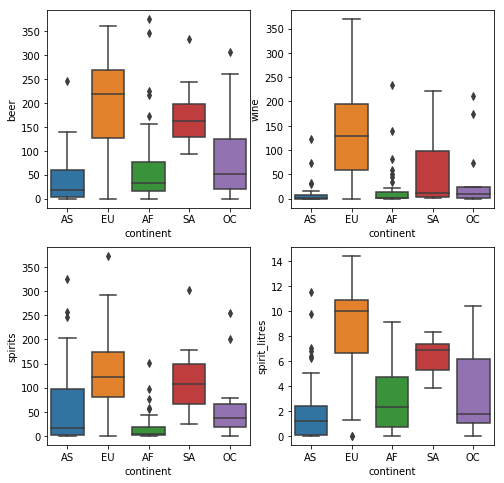

African countries: 53
Asian countries: 44
European countries: 45
South American countries: 12
Oceania countries: 16


In [4]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(x='continent', y='beer', data=drinks)

plt.subplot(2,2,2)
sns.boxplot(x='continent', y='wine', data=drinks)

plt.subplot(2,2,3)
sns.boxplot(x='continent', y='spirits', data=drinks)

plt.subplot(2,2,4)
sns.boxplot(x='continent', y='spirit_litres', data=drinks)
plt.show();

print('African countries:', len(drinks[drinks.continent=='AF']))
print('Asian countries:', len(drinks[drinks.continent=='AS']))
print('European countries:', len(drinks[drinks.continent=='EU']))
print('South American countries:', len(drinks[drinks.continent=='SA']))
print('Oceania countries:', len(drinks[drinks.continent=='OC']))

The comparison of wine consumption based on continent shows an opportunity in Africa and Asia with Asia having a lower interquartile range but with significant outliers. The EU and SA have a much higher interquartile range which could represent much more competition. Oceania has a slightly higher interquantile range than Asia but only has 16 countries compared to Asia's 44 and Africa's 53. The outliers in AF and AS could represent a high potential to penetrate the market effectively with further research.

In [5]:
dr1 = drinks.loc[((drinks['continent']=='AF') | (drinks['continent']=='AS')),
                ['continent', 'country', 'wine']]

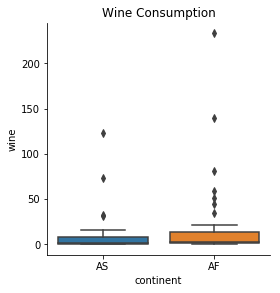

In [6]:
sns.factorplot(x='continent', y='wine', data=dr1, kind='box');
plt.title('Wine Consumption')
plt.show();

In [7]:
dr1['continent'].replace('AF', 0, inplace=True)
dr1['continent'].replace('AS', 1, inplace=True)

In [8]:
print('AF Mean:', dr1[dr1.continent == 0].wine.mean())
print('AS Mean:', dr1[dr1.continent == 1].wine.mean())

AF Mean: 16.264150943396228
AS Mean: 9.068181818181818


In [9]:
print('AF Variance:', dr1[dr1.continent == 0].wine.var())
print('AS Variance:', dr1[dr1.continent == 1].wine.var())

AF Variance: 1509.0442670536997
AS Variance: 469.46035940803387


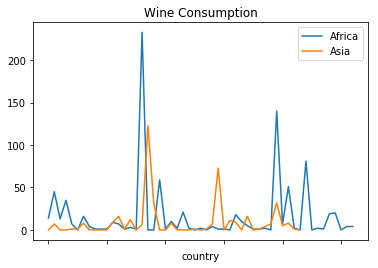

In [10]:
consumption = dr1[dr1.continent==0][['country', 'wine']].groupby('country').mean().plot()
dr1[dr1.continent==1][['country', 'wine']].groupby('country').mean().plot(ax=consumption)
plt.legend(['Africa', 'Asia'])
plt.title('Wine Consumption')
plt.show()

In [11]:
stats.ttest_ind(dr1[dr1.continent==0].wine,
               dr1[dr1.continent==1].wine)

Ttest_indResult(statistic=1.0948770009393338, pvalue=0.27633865541932107)

## Null Hypothesis

The plot above shows the range of countries with both having 3 significant spikes. But, the p-value of 0.2763 is over five times the desired threshold of 0.05. Meaning that we should take into consideration the null hypothesis of no effect. In this case, there is roughly a 27% chance that there may not be enough interest in wine in either Africa or Asia for a successful marketing campaign. Due to the small size of this sample dataset, we are simply making a case for an assumption that either country would be an ideal candidate for further research. We already speculated that these continents are not consuming much wine compared to others, but for that reason we want to find out why and if there is a possibility to penetrate the market successfully with research by collecting much more data. It would be difficult to make a positive ROI in a location with high competiton, so I am writing this proposal in mind for a risk that could yield high rewards with thorough study.

In [12]:
dr1[dr1['continent']==0].sort_values('wine', ascending=False).head(10)

,continent,country,wine
55,0,Equatorial Guinea,233
148,0,Sao Tome & Principe,140
159,0,South Africa,81
62,0,Gabon,59
152,0,Seychelles,51
4,0,Angola,45
22,0,Botswana,35
71,0,Guinea-Bissau,21
175,0,Tunisia,20
172,0,Togo,19


In [13]:
dr1[dr1['continent']==1].sort_values('wine', ascending=False).head(10)

,continent,country,wine
92,1,Laos,123
141,1,Russian Federation,73
177,1,Turkmenistan,32
94,1,Lebanon,31
167,1,Syria,16
85,1,Japan,16
87,1,Kazakhstan,12
154,1,Singapore,11
138,1,South Korea,9
82,1,Israel,9


## The Potential Solution and Method of Testing

> Further market research should be conducted in Africa. The method of testing would be conducted in Equatorial Guinea and Sao Tome & Principe due to a high potential for test subjects. We will conduct A/B testing with local popular wines as the control variable and our wine collections as the test variable with similar demographic groups of random subjects. 

> We will calculate the taste preferences of the groups for one month to collect a significant sample of the population. Continuing by gathering data on the taste preferences for target demographic groups and assign a taste profile for future marketing strategies.

> If the test groups show a higher average of preference for our wine collection, we will utilize the taste profiles assigned to each demographic to begin formulating tests for marketing strategies. If the test groups show slightly less than average preference for our wine collection we will continue the study for another month. But, if the test groups show significantly less than average preference for our wine collection after the second month, we will begin planning on conducting tests in Asia by seeking test subjects in Laos.

## Conclusion

Equatorial Guinea is one of the richest countries in Africa. We can research insights for a wide range of demographics from a population of nearly 1.3 million, of which we hope to learn from high-income consumers. Sao Tome & Principe has a more lower-middle income demographic for a population of nearly 200 thousand, of which we hope to learn how to reach a large portion of the lower-income populations. By conducting research in both locations we can learn marketing strategies for both our premium collections as well as the lower-tier collections. With this information we can potentially penetrate the market for both upper and lower income consumers before continuing expansion to other targeted countries.